In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [8]:
data = pd.read_csv("/content/co2_gr_mlo.csv", comment="#")

In [9]:
data.head()

,year,ann inc,unc
0,1959,0.94,0.11
1,1960,0.50,0.11
2,1961,0.96,0.11
3,1962,0.65,0.11
4,1963,0.71,0.11


In [10]:
result = adfuller(data['ann inc'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.6997295499842872
p-value: 0.8468195781001621


In [11]:
x = int(0.8 * len(data))
train_data = data.iloc[:x]
test_data = data.iloc[x:]

In [12]:
lag_order = 13
model = AutoReg(train_data['ann inc'], lags=lag_order)
model_fit = model.fit()

<Figure size 1000x600 with 0 Axes>

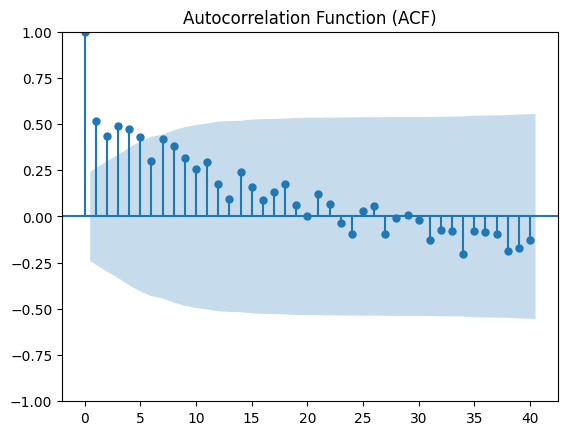

In [13]:
plt.figure(figsize=(10, 6))
plot_acf(data['ann inc'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x600 with 0 Axes>

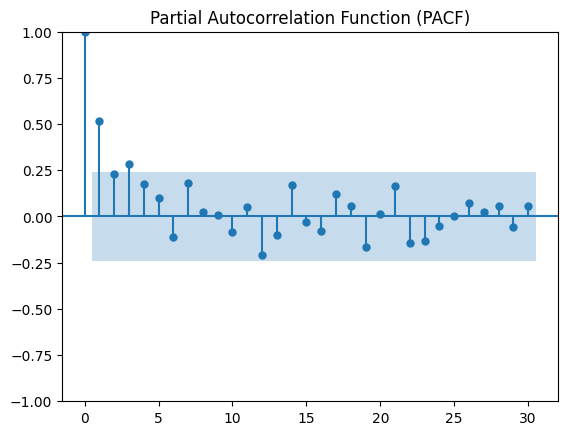

In [16]:
plt.figure(figsize=(10, 6))
plot_pacf(data['ann inc'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [15]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
mse = mean_squared_error(test_data['ann inc'], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 0.6922510598371704


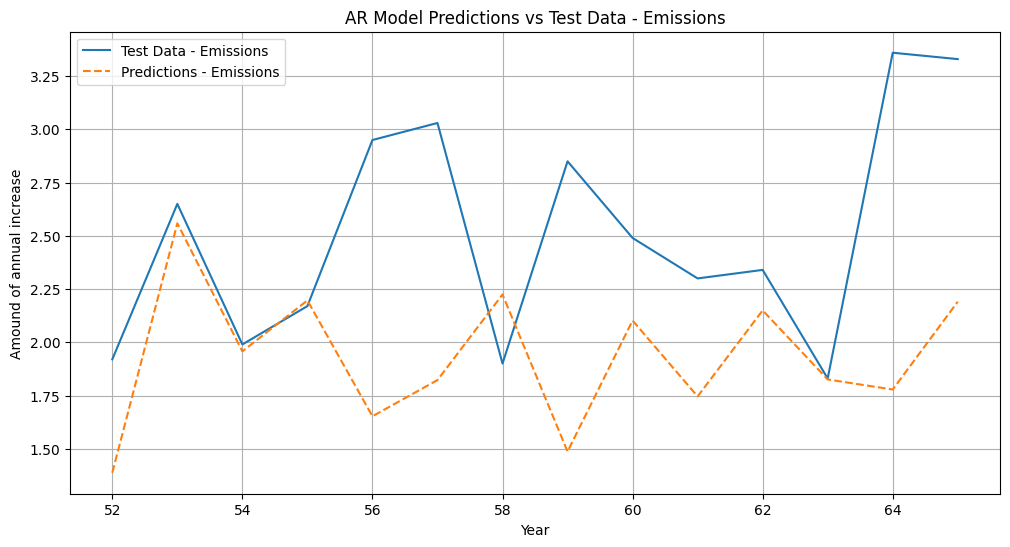

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['ann inc'], label='Test Data - Emissions')
plt.plot(predictions, label='Predictions - Emissions', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Amound of annual increase')
plt.title('AR Model Predictions vs Test Data - Emissions')
plt.legend()
plt.grid()
plt.show()